In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


# Data Cleaning

In [17]:
df = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')

In [18]:
# Removing empty spaces in column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('  ', '')
df.columns = df.columns.str.replace(' ', '_')
df.columns

# Convert 'Status' to category 
df['Status'] = df['Status'].astype('category')

In [19]:
# First 5 rows of df
pd.set_option('display.max_columns', 22)
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# **Exploratory Data Analysis (EDA)**

> Do various predicting factors that has been chosen initially really affect Life expectancy? What are the predicting variables actually affecting the life expectancy?

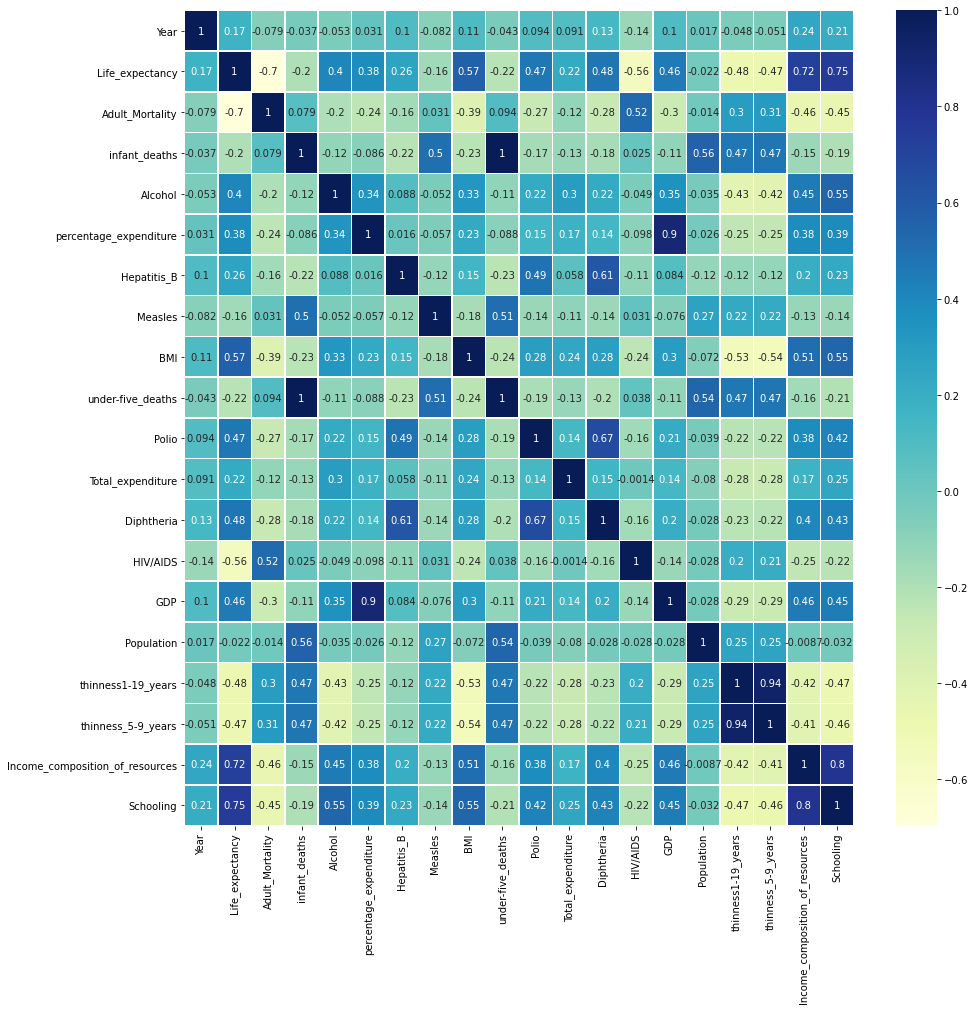

In [20]:
# Plot a heatmap showing correlation between predicting variables 
hm = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(hm, linewidths=.5, annot=True, cmap="YlGnBu")

In [21]:
# Correlation of the predicting factors chosen inititally
correlation = []

for i in list(df.columns[3:9]):
     a = df['Life_expectancy'].corr(df[i])
     correlation.append(a)

zipped = zip(list(df.columns[3:9]),correlation)
zipped = list(zipped)
zipped

[('Life_expectancy', 1.0),
 ('Adult_Mortality', -0.6963593137699758),
 ('infant_deaths', -0.19655717665526165),
 ('Alcohol', 0.40487676112660204),
 ('percentage_expenditure', 0.3818635033900497),
 ('Hepatitis_B', 0.2567619476049244)]

> Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

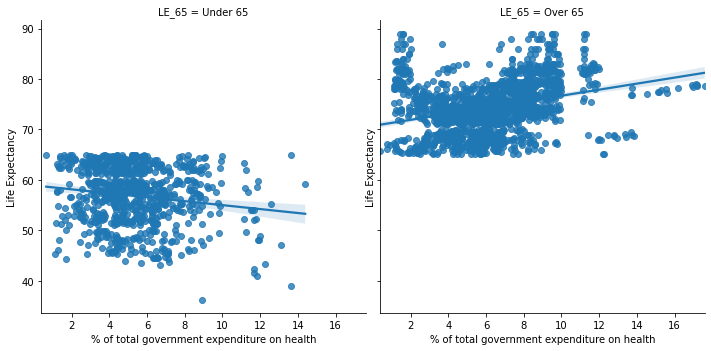

In [22]:
# Seperate life expectancy into 2 categories
label_ranges = [0, 65, np.inf]
label_names = ['Under 65', 'Over 65']

df['LE_65'] = pd.cut(df['Life_expectancy'], bins = label_ranges, labels = label_names)

_ = sns.lmplot(x = 'Total_expenditure',y = 'Life_expectancy', data = df, col='LE_65')
_.set(xlabel='% of total government expenditure on health', ylabel='Life Expectancy')

plt.show()

> How do Infant and Adult mortality rates affect life expectancy?

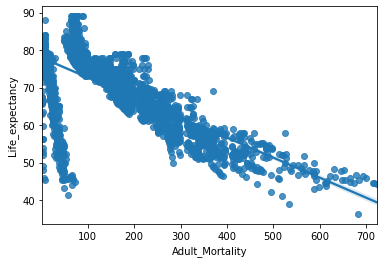

In [23]:
X = df['Adult_Mortality']
Y = df['Life_expectancy']

sns.regplot(x= 'Adult_Mortality', y='Life_expectancy', data=df) 

plt.show()

> Does Life Expectancy have a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol, etc.



In [24]:
# Calculate the correlation
results = smf.ols('Life_expectancy ~ Alcohol', data=df).fit()

def corr(data, col1, col2):
    a = data[col1].corr(df[col2])
    if a > 0:
        print(col2 + ' has a positive correlation with ' + col1 +': '+ str(a))
    else:
        print(col2 + ' has a negative correlation with ' + col1 +': '+ str(a))

corr(df, 'Life_expectancy', 'Alcohol')
corr(df, 'Life_expectancy', 'BMI') 
corr(df, 'Life_expectancy', 'Schooling') 
corr(df, 'Life_expectancy', 'Population') 

Alcohol has a positive correlation with Life_expectancy: 0.40487676112660204
BMI has a positive correlation with Life_expectancy: 0.5676935475459864
Schooling has a positive correlation with Life_expectancy: 0.7519754627366979
Population has a negative correlation with Life_expectancy: -0.021538108386786478
